In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('keno_results_new.csv')
df.drop('king ball',axis=1,inplace=True)

In [2]:
X_train=df.copy()
jj=[]
for line in range(0,len(X_train.index)-1):
    for col in range(20):
        jj.append(X_train[X_train.columns[col]][line])
        if col == 19:
            for _2col in range(20):
                jj.append(X_train[X_train.columns[_2col]][line+1])

In [3]:
new_jj=np.reshape(jj,newshape=(-1,40))

In [4]:
len(new_jj)

3369

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370 entries, 0 to 3369
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ball 1   3370 non-null   int64
 1   ball 2   3370 non-null   int64
 2   ball 3   3370 non-null   int64
 3   ball 4   3370 non-null   int64
 4   ball 5   3370 non-null   int64
 5   ball 6   3370 non-null   int64
 6   ball 7   3370 non-null   int64
 7   ball 8   3370 non-null   int64
 8   ball 9   3370 non-null   int64
 9   ball 10  3370 non-null   int64
 10  ball 11  3370 non-null   int64
 11  ball 12  3370 non-null   int64
 12  ball 13  3370 non-null   int64
 13  ball 14  3370 non-null   int64
 14  ball 15  3370 non-null   int64
 15  ball 16  3370 non-null   int64
 16  ball 17  3370 non-null   int64
 17  ball 18  3370 non-null   int64
 18  ball 19  3370 non-null   int64
 19  ball 20  3370 non-null   int64
dtypes: int64(20)
memory usage: 526.7 KB


SO if you noticed that e got one entry more than what we need 
in X_train we have 3370 entries 
and in y_train we will got 3369 entries so we will drop out the last one of X_entries

In [6]:
y_train=pd.DataFrame(new_jj)
y_train.head
X_train.drop(X_train.index[-1],axis=0,inplace=True)
# y_train.index
# X_train.index

In [7]:
y_train.index
X_train.index


RangeIndex(start=0, stop=3369, step=1)

In [21]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

# X_train = pd.DataFrame(ss.fit_transform(X_train))
# y_train=pd.DataFrame(ss.fit_transform(y_train))

X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)

In [32]:
from tensorflow import keras
from tensorflow.python.keras.models import Sequential

from tensorflow.python.keras.layers import (Dense, BatchNormalization)



import tensorflow as tf
model = Sequential([
    BatchNormalization(input_shape=[20]),
    Dense(500, activation='relu'),
    BatchNormalization(),
    Dense(500, activation='relu'),
    BatchNormalization(),
    Dense(40),
])



ImportError: cannot import name 'BatchNormalization' from 'tensorflow.python.keras.layers' (c:\Users\hussam\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\keras\layers\__init__.py)

In [11]:
model.compile(
    optimizer='adam',
    loss='mae',
)


In [12]:
history = model.fit(
    X_train, y_train,
    
    batch_size=256,
    epochs=500,
)


Epoch 1/500
14/14 [==============================] - 1s 21ms/step - loss: 15.1277
Epoch 2/500
14/14 [==============================] - 0s 19ms/step - loss: 5.1928
Epoch 3/500
14/14 [==============================] - 0s 14ms/step - loss: 4.0970
Epoch 4/500
14/14 [==============================] - 0s 11ms/step - loss: 3.7041
Epoch 5/500
14/14 [==============================] - 0s 12ms/step - loss: 3.4313
Epoch 6/500
14/14 [==============================] - 0s 12ms/step - loss: 3.2758
Epoch 7/500
14/14 [==============================] - 0s 12ms/step - loss: 3.1572
Epoch 8/500
14/14 [==============================] - 0s 12ms/step - loss: 3.0679
Epoch 9/500
14/14 [==============================] - 0s 12ms/step - loss: 2.9889
Epoch 10/500
14/14 [==============================] - 0s 13ms/step - loss: 2.9243
Epoch 11/500
14/14 [==============================] - 0s 13ms/step - loss: 2.8705
Epoch 12/500
14/14 [==============================] - 0s 13ms/step - loss: 2.8327
Epoch 13/500
14/14 [====

<Axes: >

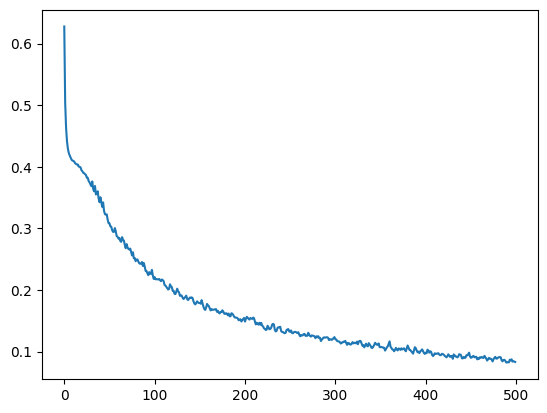

In [ ]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()


In [ ]:
ss.inverse_transform(model.predict(np.reshape(X_train.loc[len(X_train)-1],(1,20))))

array([[ 1.0048634,  6.924768 , 10.05877  , 10.992935 , 18.934639 ,
        19.788319 , 20.998966 , 26.868343 , 29.229368 , 32.980076 ,
        40.747005 , 42.182556 , 45.047474 , 48.008694 , 50.168392 ,
        52.093254 , 54.917984 , 62.013374 , 64.03247  , 67.95896  ,
         7.948286 , 10.53074  , 19.813898 , 28.102728 , 32.247314 ,
        32.345142 , 36.76515  , 39.09232  , 41.385952 , 42.298847 ,
        46.01444  , 53.323273 , 56.604225 , 58.76345  , 60.795326 ,
        61.922844 , 63.4253   , 64.33791  , 68.21246  , 69.850525 ]],
      dtype=float32)

In [23]:
dd=np.concatenate([X_train,y_train],axis=1)

dd=pd.DataFrame(dd)
dd

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,2,8,10,11,12,20,21,22,29,31,...,37,41,42,45,46,49,51,68,69,70
1,2,13,16,26,27,30,31,36,40,44,...,43,45,46,49,50,53,56,57,61,70
2,12,13,16,22,23,27,28,30,32,38,...,26,29,33,35,40,43,51,60,68,69
3,5,6,8,12,15,23,25,26,30,32,...,38,42,43,50,55,60,62,65,69,70
4,5,6,7,15,21,33,34,35,38,41,...,37,39,44,51,53,56,59,62,67,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,15,19,22,23,26,27,28,29,34,36,...,43,49,54,56,58,61,62,63,64,68
2691,4,6,9,20,30,32,34,37,38,42,...,36,43,45,49,50,56,61,63,64,65
2692,1,10,17,26,27,28,31,32,37,42,...,35,36,40,45,48,50,52,55,56,61
2693,1,2,4,5,9,10,11,15,20,31,...,28,34,35,54,56,59,60,61,62,70


In [24]:
X_train=dd.sample(frac=0.8,random_state=0)
# train
y_train = X_train.drop(dd.columns[0:20], axis=1)

X_train=X_train.drop(dd.columns[20:],axis=1)

# valid
X_valid = dd.drop(X_train.index)
y_valid = dd.drop(y_train.index)
X_valid = X_valid.drop(dd.columns[20:],axis=1)
y_valid = y_valid.drop(dd.columns[0:20], axis=1)


In [25]:
# Adding The earlystoping to solve validation problem
from tensorflow.python.keras.callbacks import EarlyStopping
es = EarlyStopping(
    min_delta=0.001,  # minimium amount of change to count as an improvement
    patience=25,
    restore_best_weights=True
)

In [17]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid,y_valid),
    batch_size=100,
    epochs=50000,
    callbacks=[es],
    # verbose=0
)


Epoch 1/50000
27/27 [==============================] - 1s 31ms/step - loss: 2.3142 - val_loss: 2.3038
Epoch 2/50000
27/27 [==============================] - 1s 24ms/step - loss: 2.2861 - val_loss: 2.2416
Epoch 3/50000
27/27 [==============================] - 1s 23ms/step - loss: 2.2825 - val_loss: 2.3325
Epoch 4/50000
27/27 [==============================] - 0s 12ms/step - loss: 2.3104 - val_loss: 2.2814
Epoch 5/50000
27/27 [==============================] - 1s 22ms/step - loss: 2.2929 - val_loss: 2.3747
Epoch 6/50000
27/27 [==============================] - 1s 21ms/step - loss: 2.3095 - val_loss: 2.3107
Epoch 7/50000
27/27 [==============================] - 0s 12ms/step - loss: 2.4121 - val_loss: 2.3839
Epoch 8/50000
27/27 [==============================] - 0s 11ms/step - loss: 2.3183 - val_loss: 2.2896
Epoch 9/50000
27/27 [==============================] - 0s 11ms/step - loss: 2.3285 - val_loss: 2.3570
Epoch 10/50000
27/27 [==============================] - 0s 11ms/step - loss: 2.313

<Axes: >

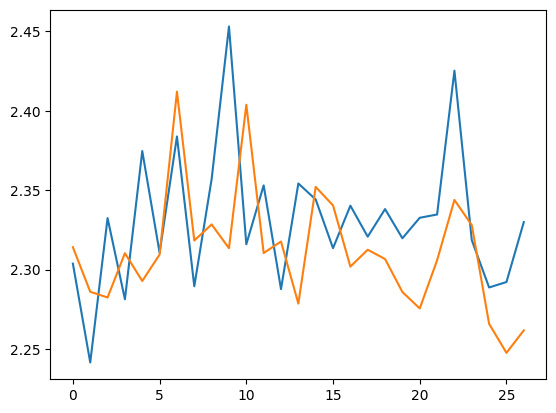

In [18]:
history_df = pd.DataFrame(history.history)
history_df['val_loss'].plot()
history_df['loss'].plot()

In [19]:
np.round(ss.inverse_transform(model.predict(np.reshape(X_train.loc[3351],(1,20)))))

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [20]:
np.round(model.predict(np.reshape(X_train.loc[3351],(1,20))))

array([[ 4.,  5.,  9., 12., 16., 17., 19., 22., 23., 27., 29., 36., 43.,
        44., 47., 49., 55., 64., 65., 69.,  3.,  6., 10., 13., 17., 21.,
        24., 27., 31., 34., 38., 41., 44., 49., 52., 56., 59., 64., 66.,
        69.]], dtype=float32)